# ARIMA Models to Predict Stocks

### 3/20/2020

Predicting time-series data can be challenging depending on the priors. Here we are going to look at two cases, both using ARIMA models to see how predictions are affected.


## ARIMA On Non-Periodic Data

We begin by importing important packages such as numpy and pandas. 
We'll analyze data found [here](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/).

Note that the data has already been downloaded locally and renamed as 'data.csv'. 


In [70]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df = pd.read_csv('data.csv')

# prints the head. Note that df.head gives a nonformatted output. df.head() is nice and pretty
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


Now that we see what the data looks like, we need to reformat the data slightly. As is common with time-series data, we first convert the index into dates using `to_datetime()`.

Finally, we'll plot the `Close` prices for each datapoint.

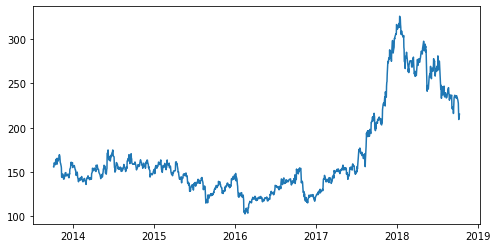

In [71]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

plt.figure(figsize=(8,4))
plt.plot(df.Close, label='Close price history')

Now it's time to train the ARIMA model! `pmdarima` (formerly pyramid) is based on `statsmodels` and offers more functionality for training ARIMA models.


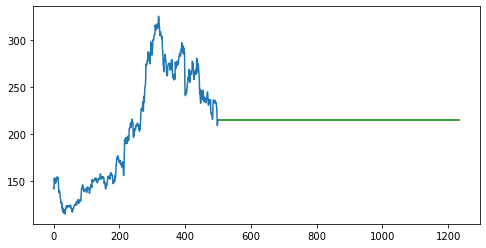

In [72]:
# ARIMA Model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

# split the data
train, test = train_test_split(df.Close, train_size=500)

# train the model
model = pm.auto_arima(np.flip(train), seasonal = False)

# make forecasts
forecasts = model.predict(test.shape[0])


# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(df.Close.shape[0])
plt.figure(figsize=(8,4))
plt.plot(x[:500], np.flip(train))
plt.plot(x[500:], forecasts, c='green')
plt.show()


We now see that the forecast is quite poor. However, because the data does not show an obvious periodic trend, a horizontal line is a better prediction than other predictions you might expect.

Let's see next what happens when we use ARIMA on a dataset with more periodic trends.


## ARIMA On Periodic Data

Now that we've seen how an ARIMA model (doesn't) work on data with weird trends, let's see how it performs given data that we know to be periodic.


I did a quick search for `christmas` in the US on Google Trends and downloaded the data for the past 16 years.

Let's load that in and see what it plots!

Text(0.5, 0, 'Time')

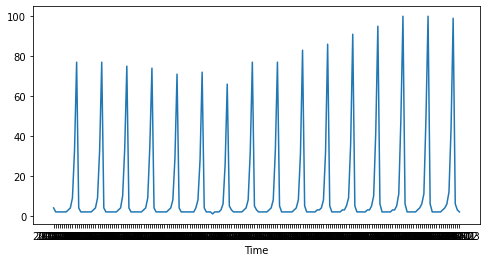

In [75]:
df = pd.read_csv('christmas.csv')

df.index = df['Month']

plt.figure(figsize=(8,4))
plt.plot(df['christmas: (United States)'])
plt.xlabel('Time')

So we see that the data is periodic with no obvious trend over time. Let's see what our ARIMA model does now!

C:\Users\youal\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


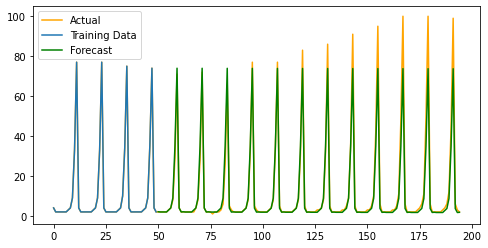

In [89]:
# split the data as before
train, test = train_test_split(df['christmas: (United States)'], train_size = 50)

# train the model
model = pm.auto_arima(train, seasonal = True, m=12)

# make forecasts
forecasts = model.predict(test.shape[0])


# Visualize
x = np.arange(len(df))
plt.figure(figsize=(8,4))
plt.plot(x,df['christmas: (United States)'], c='orange')
plt.plot(x[:50], train)
plt.plot(x[50:], forecasts, c='green')

plt.legend(['Actual', 'Training Data', 'Forecast'])
plt.show()

From this we can see that our model did a great job at predicting what happens on a 12 month cyle. However, it failed to predict any changes in peak search count over time. That's one of the shortcomings of ARIMA models. While they can be powerful tools to find periodic trends, they work less well at capturing subtle trends (though, most models would struggle with this particular data).